In [130]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('/Users/pranav/Desktop/Coding/Data-Science/DATA/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

na_index=df[df.isna().any(axis=1)].index

# Drop rows with any NaN values
df=df.drop(index=na_index).reset_index()
df.loc[df['day'].str.isnumeric(),['day']]

region_divider_index=df[~df['day'].str.isnumeric()].index[0]

#Adding a column for region
df.loc[:region_divider_index,['Region']]=0
df.loc[region_divider_index:,['Region']]=1

df=df.drop(index=region_divider_index).reset_index()

df['Region']=df['Region'].astype(int)

In [ ]:
#Modifying Columns

df.columns=df.columns.str.strip()
df=df.drop(columns=['level_0','index'])

df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

# Exploratory Data Analysis

In [53]:
# Reading cleaned dataset

df=pd.read_csv('/Users/pranav/Desktop/Coding/Data-Science/DATA/Algerian_forest_fires_cleaned_dataset.csv')

#Dropping unnecessary columns

df['year'].value_counts()
df.drop(columns=['day','month','year'],inplace=True)
df['Classes']=df['Classes'].str.strip().str.lower()

df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# Traating FWI as Dependent data

In [76]:
#Encoding categorical data

from sklearn.preprocessing import LabelEncoder

df['Classes'].value_counts()

encoder=LabelEncoder()
df['Classes']=encoder.fit_transform(df['Classes'])


# Checking for MultiColiinearity

In [124]:
X=df.drop('FWI',axis=1)
y=df['FWI']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

def corelation(data,threshold=0.85):
    corr_cols=set()
    corr_matrix=abs(data.corr())
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j]>threshold):
                corr_cols.add(corr_matrix.columns[i])
    return corr_cols

res=corelation(X_train)  

df.drop(columns=res,inplace=True)
X_train.shape, X_test.shape


((182, 9), (61, 9))

# Applying Scaling

In [110]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Applying Linear Regression

0.8211435242265251

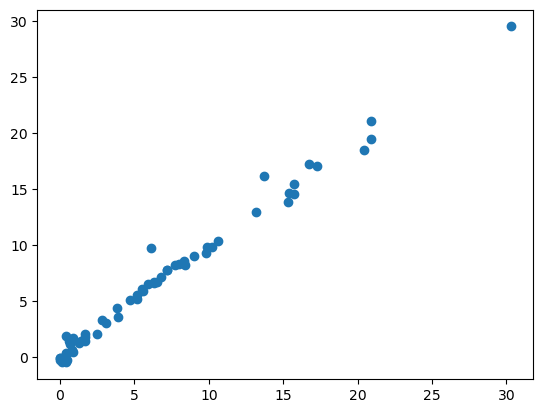

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
rmse=y_test-y_pred

plt.scatter(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

In [139]:
from sklearn.linear_model import Lasso, Ridge,ElasticNet

lasso_model=Lasso()
lasso_model.fit(X_train,y_train)

y_pred=lasso_model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

1.1653551753827815

In [140]:
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)

y_pred=ridge_model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

0.8231168066177766

In [143]:
elasticnet_model=ElasticNet()
elasticnet_model.fit(X_train,y_train)

y_pred=elasticnet_model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

1.17031653430345

# Hyper Parameter Tuning

In [150]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

lassocv_model=LassoCV(cv=5)
lassocv_model.fit(X_train,y_train)
y_pred=lassocv_model.predict(X_test)

lassocv_model.alpha_

0.08500906653785775